# The Sparks Foundation- Internship


# Task-1 of Data Science And Business Analyst

# Presented By- Ayush Jain

# Task 1- Predict the percentage of a student based on the number of study hours.


# What will be predicted  score if a student studies for 9.25hr/day?  

Importing the required libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)

In [3]:
#returns the tuple value of the shape of the data items
#Exploring the data
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


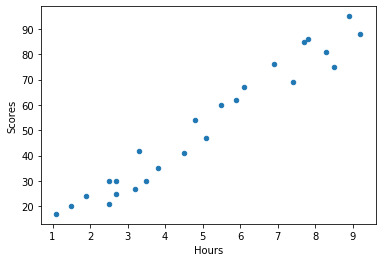

In [6]:
data.plot(kind="scatter",x='Hours',y="Scores")
plt.show()

In [7]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
data.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
hours=data["Hours"]
scores=data["Scores"]


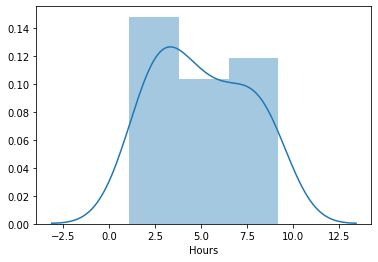

In [10]:
sns.distplot(hours)

# Linear Regression

In [11]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

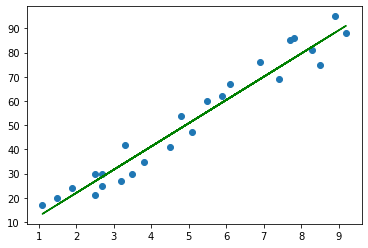

In [14]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line,color='g')
plt.show()

In [15]:
y_pred=reg.predict(X_test)


In [16]:
actual_predicted=pd.DataFrame({"Target":y_test,"Predicted":y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


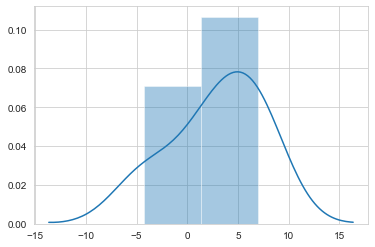

In [17]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test-y_pred))
plt.show()

# What would be the predicted score if a student studies for 9.25hrs/day

In [20]:
h=9.25
s=reg.predict([[h]])
print(f"if a student studies for {h} hours per day he/she will score {s} in exam" )

if a student studies for 9.25 hours per day he/she will score [91.56986604] in exam


# Model Evalualtion

In [21]:
#We are using two performance matrices mean absolute error and r2 score
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute error ", metrics.mean_absolute_error(y_test,y_pred))
print("R2 score = ",r2_score(y_test,y_pred))

Mean Absolute error  4.5916495300630285
R2 score =  0.971014141329942
